In [13]:
import numpy as np
import matplotlib.pyplot as plt
from stock_market_fluctuations import dynamic_cont_couchand_model

In [14]:
L = 200 # We use a L x L grid.
edges = [((i,j),(i+1,j)) for i in range(L - 1) for j in range(L)] # Horizontal edeges
edges = edges + [((i,j),(i,j+1)) for i in range(L) for j in range(L - 1)] # Vertical edges

In [15]:
b =.425 # Mean.
a = .25 # Speed of adjustment to mean.
sigma = .001 # Volatility.

dt = .01 # Time step.
T = 100 # Total time.
n = int(T / dt) # Number of time steps.
t = np.linspace(0., T, n) # Vector of times

l = 40 # Jump intensity.
mu = .015 # Jump mean.

In [16]:
pa = 1.0 # Activity probability.
pb = 0.5 # Buying probability.

In [17]:
def calculate_cumulative_sum(initial_price, price_changes):
    cumulative_sums = np.zeros(n)
    cumulative_sums[0] = initial_price + price_changes[0]
    for i in range(1,n):
        cumulative_sums[i] = cumulative_sums[i - 1] + price_changes[i]
    return cumulative_sums

In [18]:
price_changes_1 = dynamic_cont_couchand_model(edges, pa, pb, b, a, sigma, l, mu, T, dt)
price_changes_2 = dynamic_cont_couchand_model(edges, pa, pb, b, a, sigma, l, mu, T, dt)
price_changes_3 = dynamic_cont_couchand_model(edges, pa, pb, b, a, sigma, l, mu, T, dt)

100%|██████████| 10000/10000 [12:14<00:00, 13.62it/s]


In [25]:
initial_price = 1000000
cumulative_sum1 = calculate_cumulative_sum(initial_price, price_changes_1)
cumulative_sum2 = calculate_cumulative_sum(initial_price, price_changes_2)
cumulative_sum3 = calculate_cumulative_sum(initial_price, price_changes_3)

In [26]:
log_returns1 = np.insert(np.diff(np.log(cumulative_sum1)),0,0)
log_returns2 = np.insert(np.diff(np.log(cumulative_sum2)),0,0)
log_returns3 = np.insert(np.diff(np.log(cumulative_sum3)),0,0)

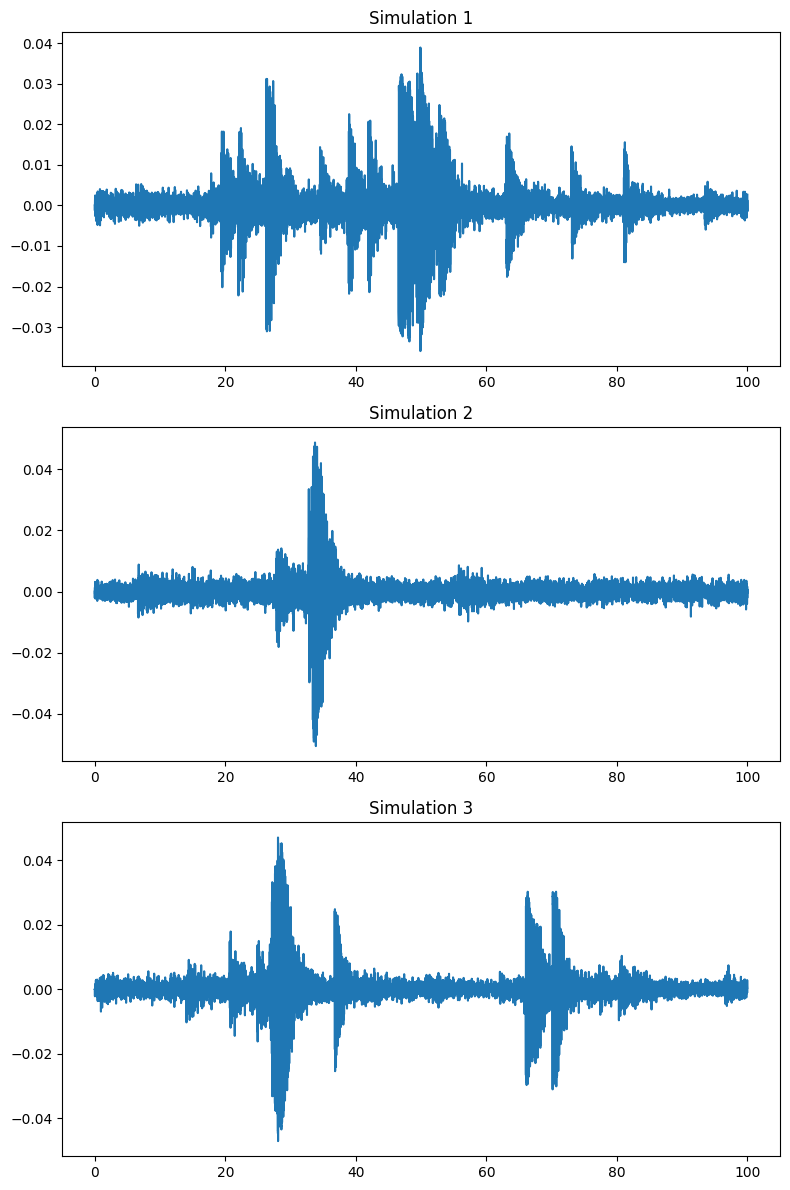

In [27]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].plot(t, log_returns1)
axs[0].set_title('Simulation 1')

axs[1].plot(t, log_returns2)
axs[1].set_title('Simulation 2')

axs[2].plot(t, log_returns3)
axs[2].set_title('Simulation 3')

plt.tight_layout()
plt.show()